# **Assignment:various dimensionality reduction techniques t-SNE,UMAP,LLE,ISOMAP**


# **t-SNE**

In [ ]:
!pip install scprep phate umap-learn

     |████████████████████████████████| 104 kB 4.2 MB/s 
     |████████████████████████████████| 86 kB 4.5 MB/s 
     |████████████████████████████████| 45 kB 2.9 MB/s 
     |████████████████████████████████| 416 kB 56.4 MB/s 
     |████████████████████████████████| 1.8 MB 47.0 MB/s 
     |████████████████████████████████| 1.1 MB 41.4 MB/s 
  Created wheel for umap-learn: filename=umap_learn-0.5.2-py3-none-any.whl size=82709 sha256=392147bd4760cc4fda5116fa9f789ad639577f42ab6a2593191a2c1d248e9270
  Stored in directory: /root/.cache/pip/wheels/84/1b/c6/aaf68a748122632967cef4dffef68224eb16798b6793257d82
  Created wheel for pynndescent: filename=pynndescent-0.5.5-py3-none-any.whl size=52603 sha256=6711099c69b1e36f6a81e1a4a469f4bb721e28b6fc7c65de39f373ae95c3e461
  Stored in directory: /root/.cache/pip/wheels/af/e9/33/04db1436df0757c42fda8ea6796d7a8586e23c85fac355f476
Successfully built umap-learn pynndescent


In [ ]:
import scprep
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
scprep.io.download.download_google_drive("1GYqmGgv-QY6mRTJhOCE1sHWszRGMFpnf", "data.pickle.gz")
scprep.io.download.download_google_drive("1q1N1s044FGWzYnQEoYMDJOjdWPm_Uone", "metadata.pickle.gz")

In [ ]:
data = pd.read_pickle("data.pickle.gz")
metadata = pd.read_pickle("metadata.pickle.gz")

In [ ]:
df_pca = scprep.reduce.pca(data, n_components=100, method='dense')

In [ ]:
data_pca_subsample, metadata_subsample = scprep.select.subsample(df_pca, metadata, n=3000)

In [ ]:
import sklearn.manifold
tsne_op = sklearn.manifold.TSNE()
data_tsne = tsne_op.fit_transform(data_pca_subsample)

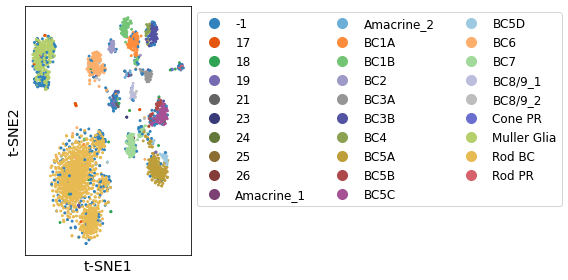

In [ ]:
scprep.plot.scatter2d(data_tsne, c=metadata_subsample['CELLTYPE'],
                      figsize=(8,4), legend_anchor=(1,1),
                      ticks=False, label_prefix='t-SNE')

In [ ]:

# experiment with the perplexity parameter
tsne_op = sklearn.manifold.TSNE(perplexity=10)
data_tsne =tsne_op.fit_transform(data_pca_subsample)


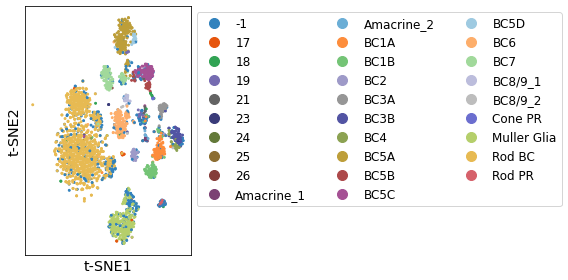

In [ ]:
scprep.plot.scatter2d(data_tsne, c=metadata_subsample['CELLTYPE'],
                      figsize=(8,4), legend_anchor=(1,1), ticks=False, label_prefix='t-SNE')

# **UMAP**

In [ ]:
import umap
umap_op = umap.UMAP()
data_umap = umap_op.fit_transform(df_pca)

/usr/local/lib/python3.7/dist-packages/numba/np/ufunc/parallel.py:363: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9107. The TBB threading layer is disabled.
  warnings.warn(problem)


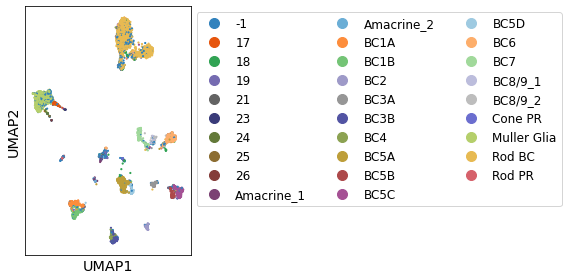

In [ ]:
scprep.plot.scatter2d(data_umap, c=metadata['CELLTYPE'],
                      figsize=(8,4), legend_anchor=(1,1), ticks=False, label_prefix='UMAP')

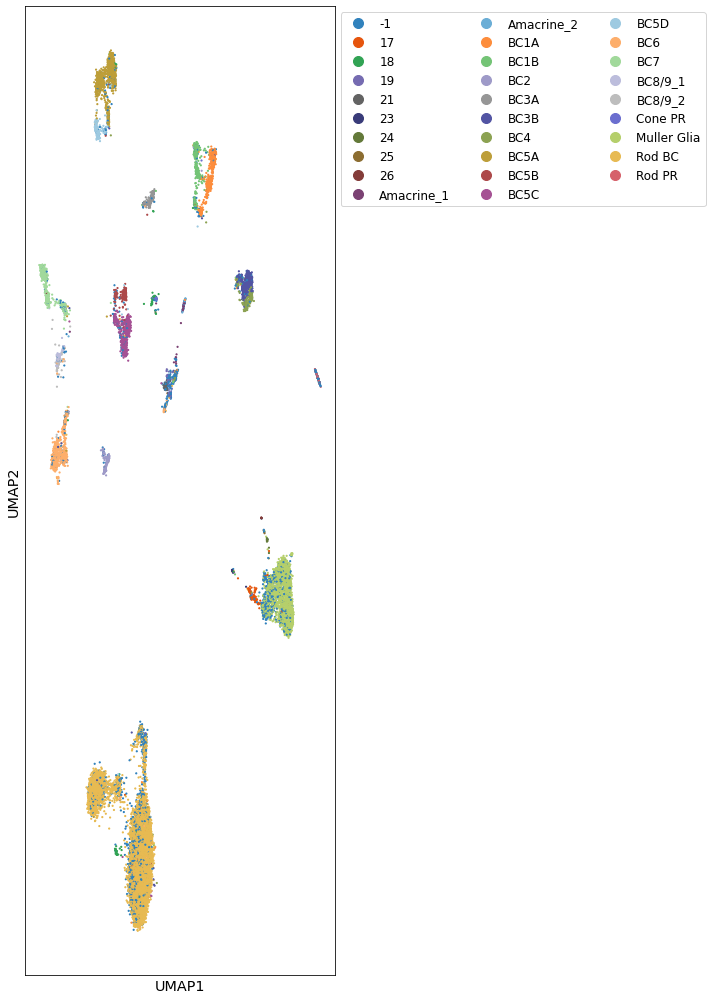

In [ ]:
umap_op =umap.UMAP()
data_umap = umap_op.fit_transform(df_pca)
scprep.plot.scatter2d(data_umap, c=metadata['CELLTYPE'],
                      figsize=(10,14), legend_anchor=(1,1), ticks=False, label_prefix='UMAP')

# **LLE**

In [ ]:
%matplotlib inline
import matplotlib.pyplot as matplt
import seaborn as sns; sns.set()
import numpy as np

Writing a function to create a Word 

In [ ]:
def hello_word(N=1000, rseed=42):
    # Make a plot with "hello" text; save as PNG
    fig, ax = plt.subplots(figsize=(4, 1))
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1)
    ax.axis('off')
    ax.text(0.5, 0.4, 'Mining', va='center', ha='center', weight='bold', size=85)
    fig.savefig('hello.png')
    plt.close(fig)
    
    # Open this PNG and draw random points from it
    from matplotlib.image import imread
    data = imread('hello.png')[::-1, :, 0].T
    rng = np.random.RandomState(rseed)
    X = rng.rand(4 * N, 2)
    i, j = (X * data.shape).astype(int).T
    mask = (data[i, j] < 1)
    X = X[mask]
    X[:, 0] *= (data.shape[0] / data.shape[1])
    X = X[:N]
    return X[np.argsort(X[:, 0])]

call the function hello word and vizualize the result in rainbow colour

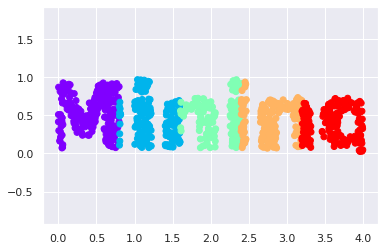

In [ ]:
X = hello_word(1000)
colorize = dict(c=X[:, 0], cmap=plt.cm.get_cmap('rainbow', 5))
plt.scatter(X[:, 0], X[:, 1], **colorize)
plt.axis('equal');

rotate the function/output by changing x and y axis values but the data would be the same

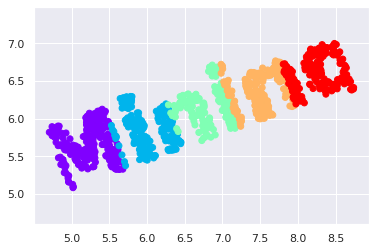

In [ ]:
def m_rotate(X, angle):
    theta = np.deg2rad(angle)
    R = [[np.cos(theta), np.sin(theta)],
         [-np.sin(theta), np.cos(theta)]]
    return np.dot(X, R)
    
X2 = rotate(X, 20) + 5
matplt.scatter(X2[:, 0], X2[:, 1], **colorize)
matplt.axis('equal');

In [ ]:
from sklearn.metrics import pairwise_distances
D = pairwise_distances(X)
D.shape

(1000, 1000)

Visualization of 1000*1000 Matrix

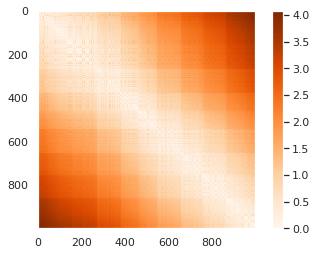

In [ ]:
matplt.imshow(D, zorder=2, cmap='Oranges', interpolation='nearest')
matplt.colorbar();

Check if the rotated and transformed data are the same

In [ ]:
D2 = pairwise_distances(X2)
np.allclose(D, D2)

True

MDS Manifold learning

(-2.053819176282479,
 2.1201794161272765,
 -1.3474127150682038,
 1.4059132511800527)

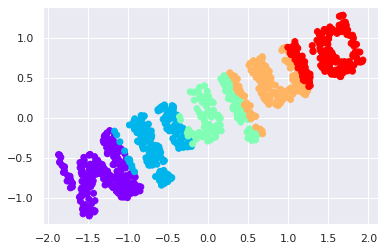

In [ ]:
from sklearn.manifold import MDS
model = MDS(n_components=2, dissimilarity='precomputed', random_state=1)
out = model.fit_transform(D)
matplt.scatter(out[:, 0], out[:, 1], **colorize)
matplt.axis('equal')

In [ ]:
def random_projection(X, dimension=3, rseed=42):
    assert dimension >= X.shape[1]
    rng = np.random.RandomState(rseed)
    C = rng.randn(dimension, dimension)
    e, V = np.linalg.eigh(np.dot(C, C.T))
    return np.dot(X, V[:X.shape[1]])
    
X3 = random_projection(X, 3)

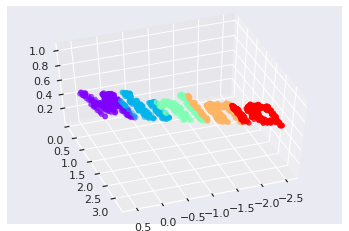

In [ ]:
from mpl_toolkits import mplot3d
ax = matplt.axes(projection='3d')
ax.scatter3D(X3[:, 0], X3[:, 1], X3[:, 2],
             **colorize)
ax.view_init(azim=70, elev=50)

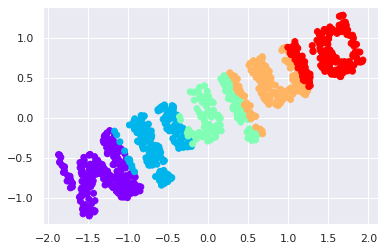

In [ ]:
model = MDS(n_components=2, random_state=1)
out3 = model.fit_transform(X3)
plt.scatter(out3[:, 0], out3[:, 1], **colorize)
plt.axis('equal');

In [ ]:
def mining_curve(X):
    t = (X[:, 0] - 2) * 0.75 * np.pi
    x = np.sin(t)
    y = X[:, 1]
    z = np.sign(t) * (np.cos(t) - 1)
    return np.vstack((x, y, z)).T

XS = mining_curve(X)

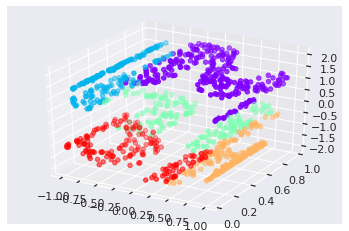

In [ ]:
from mpl_toolkits import mplot3d
ax = matplt.axes(projection='3d')
ax.scatter3D(XS[:, 0], XS[:, 1], XS[:, 2],
             **colorize);

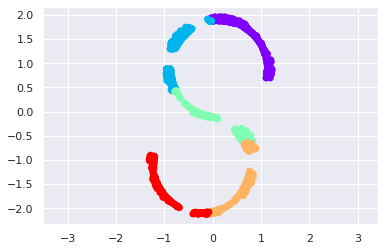

In [ ]:
from sklearn.manifold import MDS
model = MDS(n_components=2, random_state=2)
outS = model.fit_transform(XS)
matplt.scatter(outS[:, 0], outS[:, 1], **colorize)
matplt.axis('equal');

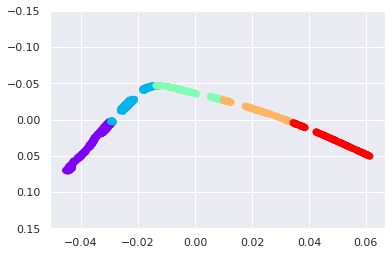

In [ ]:
from sklearn.manifold import LocallyLinearEmbedding
model = LocallyLinearEmbedding(n_neighbors=100, n_components=2, method='modified',
                               eigen_solver='dense')
out = model.fit_transform(XS)

fig, ax = plt.subplots()
ax.scatter(out[:, 0], out[:, 1], **colorize)
ax.set_ylim(0.15, -0.15);

# **ISOMAP**

Download and cache images data in home directory

In [ ]:
from sklearn.datasets import fetch_lfw_people
isomap_faces = fetch_lfw_people(min_faces_per_person=50)


Quick Visualization of images

In [ ]:
isomap_faces.data.shape

(1560, 2914)

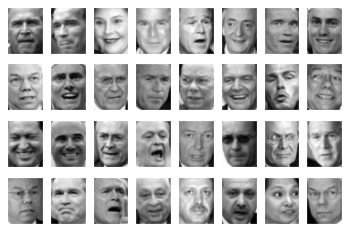

In [ ]:
fig, ax = plt.subplots(4, 8, subplot_kw=dict(xticks=[], yticks=[]))
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i], cmap='gray')

Plot low-dimensional embedding to see how many linear features are there

In [ ]:
from sklearn.decomposition import PCA as RandomizedPCA

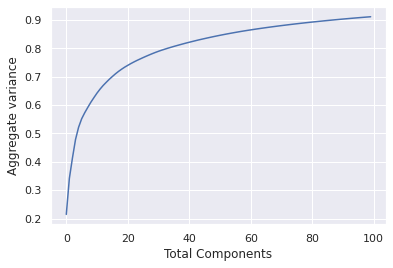

In [ ]:

model = RandomizedPCA(100).fit(faces.data)
matplt.plot(np.cumsum(model.explained_variance_ratio_))
matplt.xlabel('Total Components')
matplt.ylabel('Aggregate variance');

In [ ]:
from sklearn.manifold import Isomap
model = Isomap(n_components=2)
image_project = model.fit_transform(faces.data)
image_project.shape

(2370, 2)

In [ ]:
from matplotlib import offsetbox

def plot_components(data, model, images=None, ax=None,
                    thumb_frac=0.05, cmap='gray'):
    ax = ax or plt.gca()
    
    image_project = model.fit_transform(data)
    ax.plot(image_project[:, 0], image_project[:, 1], '.k')
    
    if images is not None:
        min_dist_2 = (thumb_frac * max(image_project.max(0) - image_project.min(0))) ** 2
        shown_images = np.array([2 * image_project.max(0)])
        for i in range(data.shape[0]):
            dist = np.sum((image_project[i] - shown_images) ** 2, 1)
            if np.min(dist) < min_dist_2:
                # don't show points that are too close
                continue
            shown_images = np.vstack([shown_images, image_project[i]])
            imagebox = offsetbox.AnnotationBbox(
                offsetbox.OffsetImage(images[i], cmap=cmap),
                                      image_project[i])
            ax.add_artist(imagebox)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:530: RuntimeWarning: invalid value encountered in multiply
  v *= signs[:, np.newaxis]


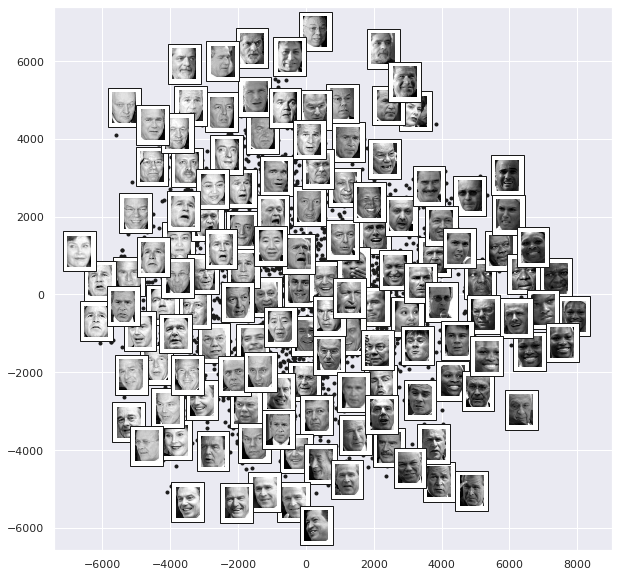

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10))
plot_components(faces.data,
                model=Isomap(n_components=2),
                images=faces.images[:, ::2, ::2])

Conclusion:
1. So far we have learned that PCA is a good choice for dimensionality reduction and visualization for datasets with a large number of variables.
2.In theory, the PCA makes no difference, but in practice, it improves training speed, simplifies the neural up the required to represent the data, and outcomes in processes that better classify the data's "intermediate structure" rather than having to account for multiple scales - it is more accurate.
3. T-SNE is a non-linear data visualizer, unlike PCA and LDA. It doesn't utilize a straight line to separate the classes or calculate variance, and it doesn't use a norm or distance metric to measure distance between points.
4.By reducing the number of features, PCA aids in overcoming data overfitting concerns. PCA produces a lot of variation, which helps with visualization.